In [46]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pgmpy.models import BayesianNetwork
from hmmlearn import hmm
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import mode
from sklearn.model_selection import train_test_split
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
from scipy.stats import mode

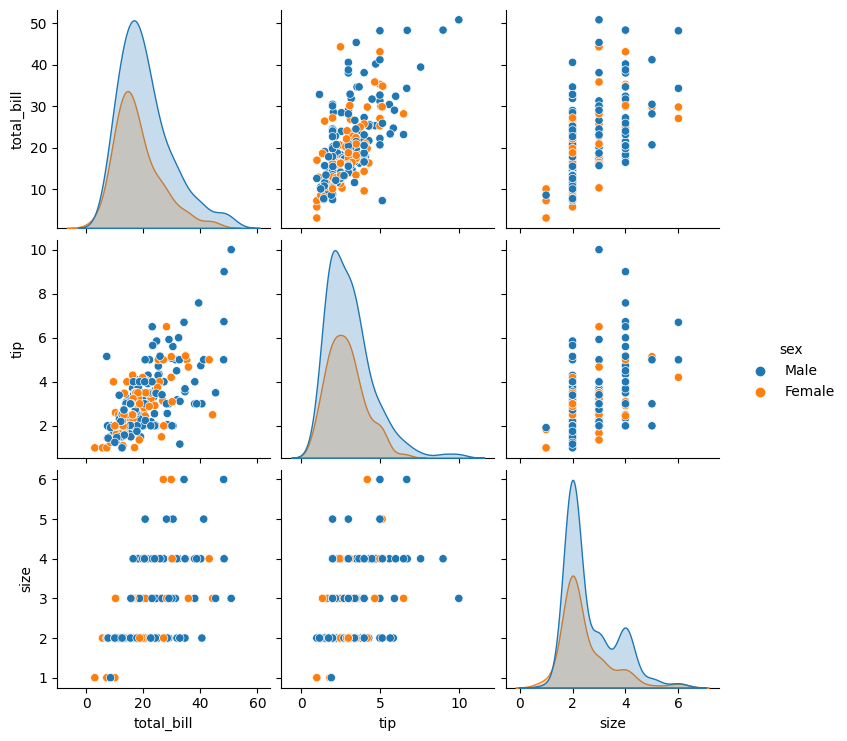

In [43]:
# Load a new sample dataset from seaborn
df = sns.load_dataset("tips")

# EDA using Seaborn
sns.pairplot(df, hue="sex")
plt.show()

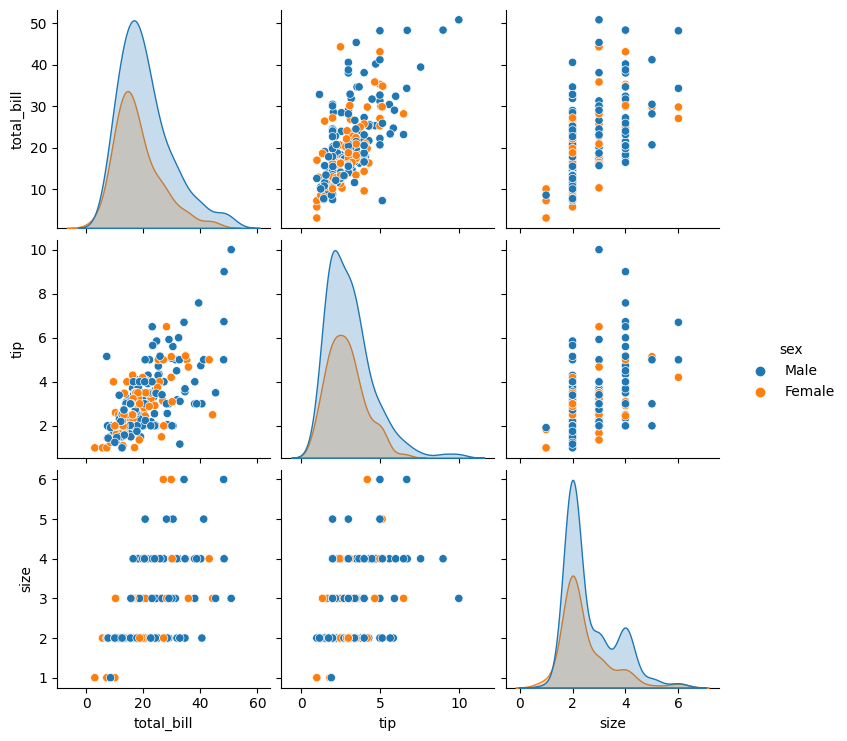

<ipython-input-47-f49134f2acd9>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


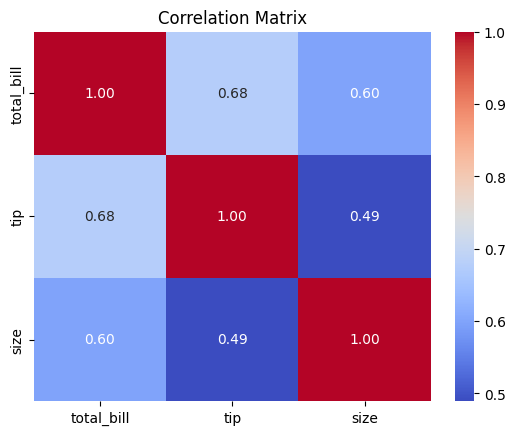

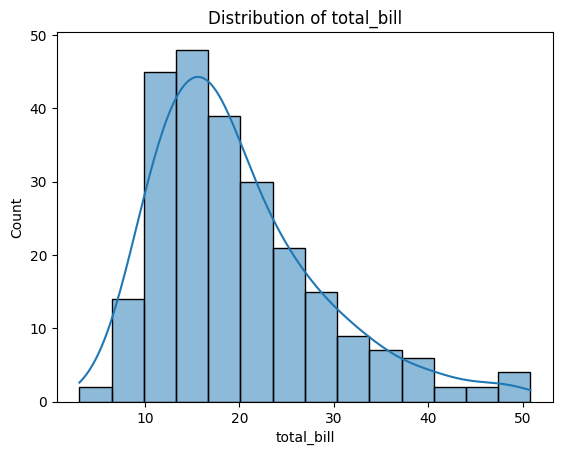

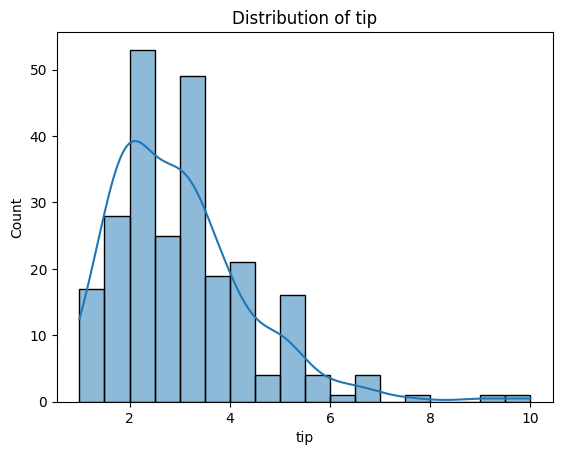

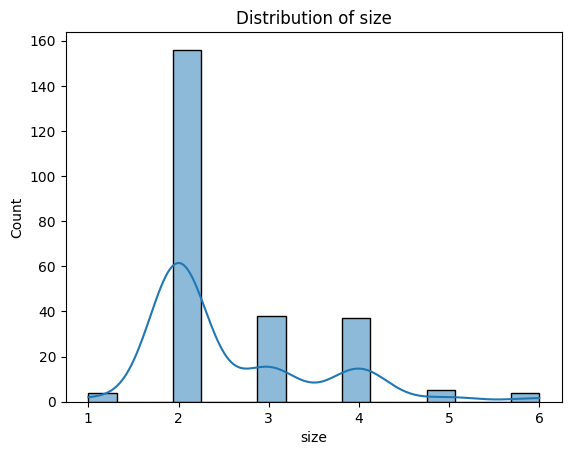

Descriptive Statistics:
       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


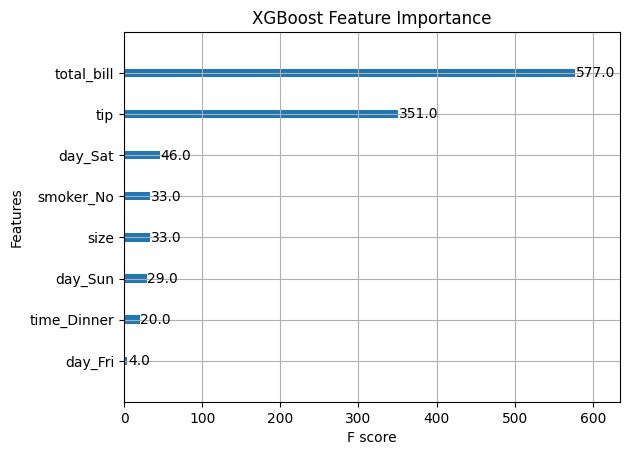

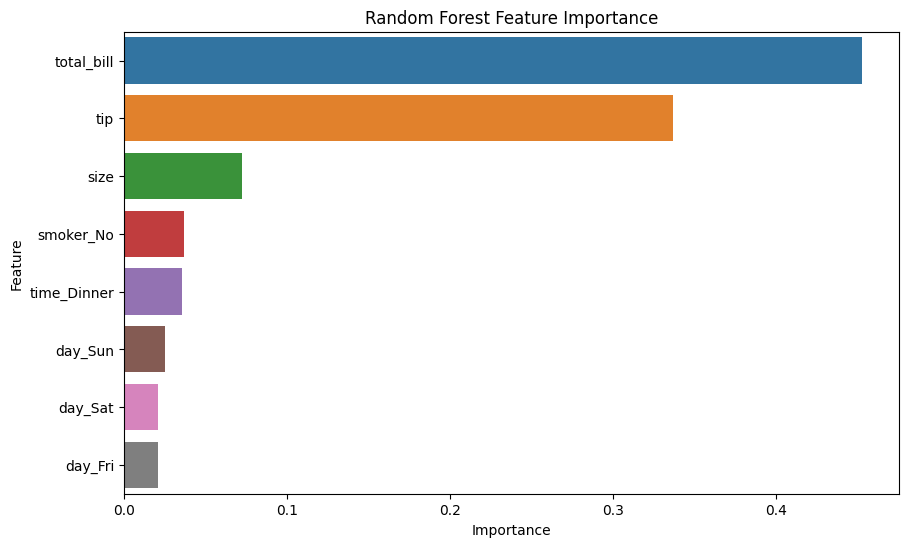

In [47]:
def main():
    # Load a new sample dataset from seaborn
    df = sns.load_dataset("tips")

    # Exploratory Data Analysis (EDA)
    # Pair plot with hue for gender
    sns.pairplot(df, hue="sex")
    plt.show()

    # Correlation matrix
    correlation_matrix = df.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()

    # Distribution plots for numerical features
    numerical_features = ['total_bill', 'tip', 'size']
    for feature in numerical_features:
        sns.histplot(df[feature], kde=True)
        plt.title(f'Distribution of {feature}')
        plt.show()

    # Descriptive statistics summary
    descriptive_stats = df.describe()
    print("Descriptive Statistics:")
    print(descriptive_stats)

    # Encode the categorical labels into numerical format
    label_encoder = LabelEncoder()
    df["sex_encoded"] = label_encoder.fit_transform(df["sex"])

    # One-hot encode categorical columns
    df_encoded = pd.get_dummies(df, columns=["smoker", "day", "time"], drop_first=True)

    # Split the data into features and target
    X = df_encoded.drop(["sex", "sex_encoded"], axis=1)
    y = df_encoded["sex_encoded"]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Bayesian Network
    model = BayesianNetwork([('total_bill', 'tip'), ('total_bill', 'size'), ('tip', 'sex_encoded'), ('size', 'sex_encoded')])
    model.fit(df_encoded)

    # Predict using Bayesian Network
    columns_for_prediction = ['total_bill', 'tip', 'size']
    y_prob_bayesian = model.predict_probability(df_encoded[columns_for_prediction])

    # Manually decode the labels based on the probabilities
    y_pred_bayesian = y_prob_bayesian.idxmax(axis=1)
    y_pred_bayesian = y_pred_bayesian.str.extract(r'sex_encoded_(\d+)').astype(int)

    # Inverse transform the decoded labels
    y_pred_bayesian = label_encoder.inverse_transform(y_pred_bayesian)

    # XGBoost
    xgb_model = XGBClassifier()
    xgb_model.fit(X_train, y_train)

    # Plot feature importance for XGBoost
    plot_importance(xgb_model)
    plt.title("XGBoost Feature Importance")
    plt.show()

    # Random Forest
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)

    # Plot feature importance for Random Forest
    feature_importance_rf = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
    feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_rf)
    plt.title("Random Forest Feature Importance")
    plt.show()

if __name__ == "__main__":
    main()


In [38]:
# Encode the categorical labels into numerical format
label_encoder = LabelEncoder()
df["sex_encoded"] = label_encoder.fit_transform(df["sex"])

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=["smoker", "day", "time"], drop_first=True)

# Split the data into features and target
X = df_encoded.drop(["sex", "sex_encoded"], axis=1)
y = df_encoded["sex_encoded"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:

# Bayesian Network
model = BayesianNetwork([('total_bill', 'tip'), ('total_bill', 'size'), ('tip', 'sex_encoded'), ('size', 'sex_encoded')])
model.fit(df_encoded)

# Predict using Bayesian Network
columns_for_prediction = ['total_bill', 'tip', 'size']
y_prob_bayesian = model.predict_probability(df_encoded[columns_for_prediction])

# Manually decode the labels based on the probabilities
y_pred_bayesian = y_prob_bayesian.idxmax(axis=1)
y_pred_bayesian = y_pred_bayesian.str.extract(r'sex_encoded_(\d+)').astype(int)

# Inverse transform the decoded labels
y_pred_bayesian = label_encoder.inverse_transform(y_pred_bayesian)

# Calculate accuracy for Bayesian Network
accuracy_bayesian = accuracy_score(df["sex"], y_pred_bayesian)
print(f"Bayesian Network Accuracy: {accuracy_bayesian}")

Bayesian Network Accuracy: 0.8401639344262295


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

XGBoost Accuracy: 0.5918367346938775


In [41]:
# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf}")

Random Forest Accuracy: 0.6530612244897959
